# Chapter 07 군집화
p.409

## 01.K-평균 알고리즘 이해
P.409

### 사이킷런 KMeans 클래스 소개
P.410

### K-평균을 이용한 붓꽃 데이터 세트 군집화
P.411

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)


irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


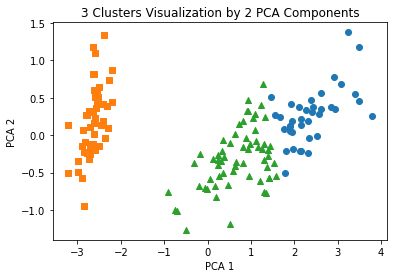

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index


# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테이트를 위한 데이터 생성
P.415

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)


# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


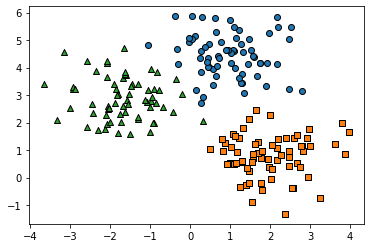

In [9]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

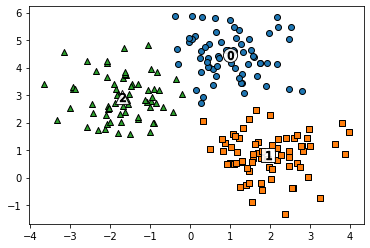

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels


# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']


# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
    
plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


## 02.군집 평가(Cluster Evaluation)
P.419

### 실루엣 분석의 개요
P.420

$$ s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))} $$

### 붓꽃 데이터 세트를 이용한 군집 평가
P.421

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_


# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)


# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples


# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
P.423 <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis

## 03.평균 이동
P.427

### 평균 이동(Mean Shift)의 개요
P.427

**평균 이동(Mean Shift)** : 중심을 데이터가 모여 있는 __밀도가 가장 높은 곳__으로 이동시키면서 군집화를 수행

* 데이터 분포도를 이용해 군집 중심점 찾음 ⇒ __확률 밀도 함수(probability density function)__ 이용
* 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
* 확률 밀도 함수를 찾기 위해 __KDE(Kernel Density Estimation)__ 이용

<br>

**확률 밀도 함수 PDF(Probability Density Function)** : 확률 변수의 분포를 나타내는 함수 (e.g. 정규분포, 감마분포, t-분포)

<br>

**KDE(Kernel Density Estimation)** : 개별 관측 데이터에 커널(Kernel) 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하는 방법. (커널 함수의 예: 가우시안 분포 함수)

* 주변 데이터와의 거리 값을 KDE 함수 값으로 입력
* 반환 값을 현재 위치에서 업데이트하면서 이동

$$KDE = \frac{1}{n}\sum_{i=1}^{n}K_h(x - x_i) = \frac{1}{nh}\sum_{i=1}^{n}K(\frac{x - x_i}{h})$$

( K: 커널 함수, x: 확률 변숫값, xi: 관측값, **h: 대역폭(bandwidth)** )

**대역폭 h** : KDE 형태를 평활화(Smoothing)하는 데 적용. 확률 밀도 추정 성능을 크게 좌우함.

* 작은 h 값 → 과적합하기 쉬움
* 큰 h 값 → 과소적합하기 쉬움

    _∴ 적절한 대역폭 h를 계산하는 것이 매우 중요_
    

* 대역폭이 클수록 적은 수의 군집 중심점
* 대역폭이 적을수록 많은 수의 군집 중심점
* 평균 이동 군집화 ⇒ 오직 __대역폭의 크기__에 따라 군집화를 수행 (군집의 개수 지정 X)

`MeanShift 클래스` 평균 이동 군지화

파라미터

* bandwidth : KDE의 대역폭 h

bandwidth=0.8

In [15]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift


X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)


meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


bandwidth=1

In [16]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


`estimate_bandwidth() 함수` 최적화된 bandwidth 값 찾기

파라미터

* 피처 데이터 세트

반환 값

* 최적화된 bandwidth 값

In [17]:
from sklearn.cluster import estimate_bandwidth


bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [18]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y


# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)


meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


`meanshift.cluster_centers_` 군집 중심 좌표 표시

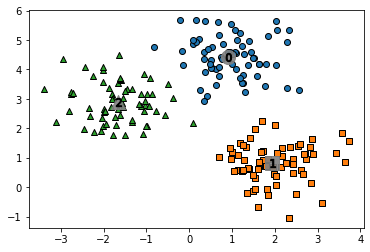

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']


for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
    
plt.show()

target 값과 군집 label 값을 비교

In [24]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


→ target 값과 군집 label 값이 1:1로 잘 매칭되었음

__평균 이동__

* 장점

    * 유연한 군집화(데이터 세트의 형태 가정 X, 특정 분포도 기반의 모델로 가정 X)
    * 이상치의 영향력이 크지 X
    * 미리 군집의 개수 정할 필요 X
    

* 단점

    * 수행 시간이 오래 걸림
    * __bandwidth의 영향력이 매우 큼__
    
⇒ 분석 업무 기반의 데이터 세트보다는 __컴퓨터 비전 영역__에서 더 많이 사용

## 04.GMM(Gaussian Mixture Model)
P.433

### GMM(Gaussian Mixture Model) 소개
P.433

**GMM 군집화** : 데이터가 여러 개의 __가우시안 분포(Gaussian Distribution)__를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

* 데이터 세트에서 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정
* __모수 추정__
    * 개별 정규 분포의 평균과 분산
    * 각 데이터가 어떤 정규 분포에 해당되는지의 확률
* [EM(Expectation & Maximization)](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) 방법

### GMM을 이용한 붓꽃 데이터 세트 군집화
P.435

GMM → 확률 기반 군집화

K-평균 → 거리 기반 군집화

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

`GaussianMixture 클래스`

파라미터

* n_components : gaussian mixture의 모델의 총 개수

In [8]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)


# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels


# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


붓꽃 데이터 세트는 K-평균 군집화보다 GMM 군집화가 더 효과적

(K-평균은 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적)

### GMM과 K-평균의 비교
P.437

**KMeans의 특징**

* 데이터가 원형의 범위를 가질수록 군집화 효율이 높아짐 (make_blobs()의 cluster_std를 작게 설정)
* 데이터가 길쭉한 타원형으로 늘어선 경우 군집화를 잘 수행하지 못함

In [10]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

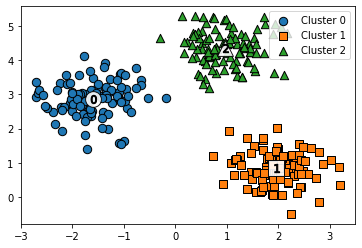

In [15]:
from sklearn.datasets import make_blobs


# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)


# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = kmeans_label


visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

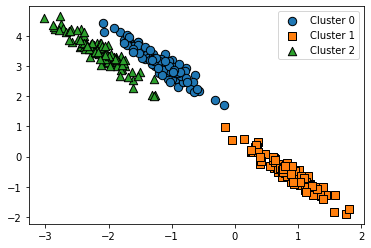

In [16]:
from sklearn.datasets import make_blobs


# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)


# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

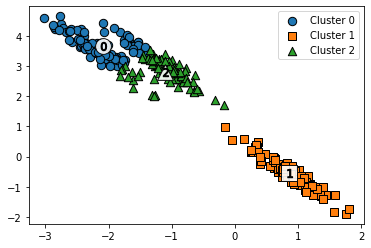

In [17]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label


visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans - 군집화 정확성이 떨어짐

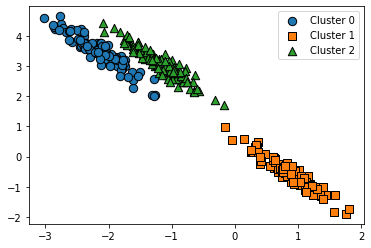

In [18]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label


# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

GMM - 정확하게 군집화됐음

(GMM은 군집의 중심 좌표를 구할 수 없기 때문에 시각화되지 않음.)

In [19]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


**GMM**

* 장점
    * KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다


* 단점
    * 수행 시간이 오래 걸린다

## 05.DBSCAN
P.441

### DBSCAN 개요
P.441

**DBSCAN(Density Based Spatial Clustering of Applications with Noise)**

: 데이터 분포가 __기하학적__으로 복잡한 데이터 세트에서 효과적인 군집화가 가능

파라미터

* 입실론 주변 영역(epsilon)
* 최소 데이터 개수(min points)


데이터 포인트

* 핵심 포인트(Core Point)
* 이웃 포인트(Neighbor Point)
* 경계 포인트(Border Point)
* 잡음 포인트(Noise Point)


⇒ DBSCAN은 핵심 포인트를 연결하면서 군집화를 구성하는 방식

`DBSCAN 클래스`

파라미터
* eps : 입실론 주변 영역의 반경 (일반적으로 1 이하의 값)
* min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수 (자신의 데이터 포함. min points + 1)

### DBSCAN 적용하기 - 붓꽃 데이터 세트
P.445

In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [22]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)


irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target


iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


### DBSCAN 적용하기 - make_circles() 데이터 세트
P.449

## 06.군집화 실습 - 고객 세그먼테이션
P.452

### 고객 세그먼테이션의 정의와 기법
P.452

### 데이터 세트 로딩과 데이터 클렌징
P.453

### RFM 기반 데이터 가공
P.456

### RFM 기반 고객 세그먼테이션
P.459

## 07.정리
P.465